#Import Libraries

In [ ]:
!pip install scikeras

import pandas as pd #data reading, manipulation and analysis
import numpy as np # data manipulation
import matplotlib.pyplot as plt # data visalisation
import seaborn as sns # data visualisation
from scipy.stats import randint

from sklearn.preprocessing import LabelEncoder, label_binarize # Encoding the class labels
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import balanced_accuracy_score, f1_score, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz


# Read data

In [ ]:
#set file path to data file
data_file = "/content/malaria_clinical_data.csv"

In [ ]:
# read in the data file with pandas
df = pd.read_csv(data_file)

# Data Exploration and Feature Engineering

In [ ]:
# Count rows and columns in dataframe
df.shape

(2207, 34)

In [ ]:
# Look at first 10 rows of dataframe
df.head(n=10)

,SampleID,consent_given,location,Enrollment_Year,bednet,fever_symptom,temperature,Suspected_Organism,Suspected_infection,RDT,...,platelet_count,platelet_distr_width,mean_platelet_vl,neutrophils_percent,lymphocytes_percent,mixed_cells_percent,neutrophils_count,lymphocytes_count,mixed_cells_count,RBC_dist_width_Percent
0,CCS20043,yes,Navrongo,2004,NaN,Yes,38.0,Not Known / Missing entry,NaN,Positive,...,156.0,8.2,6.8,61.8,31.7,6.5,3.6,1.8,0.3,19.0
1,CCS20102,yes,Navrongo,2004,NaN,Yes,38.2,Not Known / Missing entry,NaN,Positive,...,55.0,16.5,7.6,68.5,23.6,7.9,5.4,1.8,0.6,14.4
2,CCS20106,yes,Navrongo,2004,NaN,Yes,37.7,Not Known / Missing entry,NaN,Positive,...,20.0,2.3,5.9,32.8,53.3,13.9,2.8,4.3,1.1,18.0
3,CCS20147,yes,Navrongo,2004,NaN,Yes,37.7,Not Known / Missing entry,NaN,Positive,...,132.0,17.2,6.2,82.6,11.5,5.9,13.2,1.8,0.9,13.7
4,CCS20170,yes,Navrongo,2004,NaN,Yes,37.1,Not Known / Missing entry,NaN,Positive,...,85.0,16.1,6.8,83.7,11.3,5.0,3.8,0.5,0.2,15.0
5,CCS20183,yes,Navrongo,2003,NaN,Yes,38.1,Not Known / Missing entry,NaN,Positive,...,383.0,4.9,7.2,66.6,21.6,11.8,6.0,1.8,1.0,18.7
6,CCS20249,yes,Navrongo,2004,NaN,Yes,39.7,Not Known / Missing entry,NaN,Positive,...,297.0,14.1,6.6,77.0,18.2,4.8,19.4,4.5,1.1,16.5
7,CCS20260,yes,Navrongo,2004,NaN,Yes,36.0,Not Known / Missing entry,NaN,Positive,...,103.0,14.2,7.3,43.0,50.2,6.8,2.5,2.7,0.3,16.5
8,CCS20273,yes,Navrongo,2003,NaN,Yes,38.2,Not Known / Missing entry,NaN,Positive,...,41.0,10.0,7.0,58.6,23.3,18.1,6.9,2.6,2.0,16.9
9,CCS20292,yes,Navrongo,2004,NaN,Yes,38.7,Not Known / Missing entry,NaN,Positive,...,97.0,13.6,6.6,63.5,21.0,15.5,5.5,1.7,1.2,15.2


In [ ]:
#list column names
df.columns

Index(['SampleID', 'consent_given', 'location', 'Enrollment_Year', 'bednet',
       'fever_symptom', 'temperature', 'Suspected_Organism',
       'Suspected_infection', 'RDT', 'Blood_culture', 'Urine_culture',
       'Taq_man_PCR', 'parasite_density', 'Microscopy', 'Laboratory_Results',
       'Clinical_Diagnosis', 'wbc_count', 'rbc_count', 'hb_level',
       'hematocrit', 'mean_cell_volume', 'mean_corp_hb', 'mean_cell_hb_conc',
       'platelet_count', 'platelet_distr_width', 'mean_platelet_vl',
       'neutrophils_percent', 'lymphocytes_percent', 'mixed_cells_percent',
       'neutrophils_count', 'lymphocytes_count', 'mixed_cells_count',
       'RBC_dist_width_Percent'],
      dtype='object')

In [ ]:
#Look at data information (e.g. null counts, datatype, number of rows, columns)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2207 entries, 0 to 2206
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   SampleID                2207 non-null   object 
 1   consent_given           2207 non-null   object 
 2   location                2207 non-null   object 
 3   Enrollment_Year         2207 non-null   int64  
 4   bednet                  1676 non-null   object 
 5   fever_symptom           2200 non-null   object 
 6   temperature             2197 non-null   float64
 7   Suspected_Organism      2207 non-null   object 
 8   Suspected_infection     1569 non-null   object 
 9   RDT                     2065 non-null   object 
 10  Blood_culture           122 non-null    object 
 11  Urine_culture           112 non-null    object 
 12  Taq_man_PCR             176 non-null    object 
 13  parasite_density        2173 non-null   float64
 14  Microscopy              2170 non-null   

Feature Selection

In [ ]:
# Create a new dataframe which is the subset of df (keeping all rows and from column 'Clinincal Diagnosis' to 'RBC_dist_width_Percent)
subset = df.iloc[:,16:]
#Check information of new dataframe
subset.shape

(2207, 18)

Address Missing/Null Values

In [ ]:
#Count total of missing values for each column
subset.isnull().sum()

Clinical_Diagnosis         0
wbc_count                  0
rbc_count                  0
hb_level                   0
hematocrit                 0
mean_cell_volume           0
mean_corp_hb               3
mean_cell_hb_conc          2
platelet_count             9
platelet_distr_width      32
mean_platelet_vl          17
neutrophils_percent        0
lymphocytes_percent        0
mixed_cells_percent        0
neutrophils_count         12
lymphocytes_count         11
mixed_cells_count         11
RBC_dist_width_Percent     9
dtype: int64

In [ ]:
#Remove all rows with missing values
subset.dropna(inplace=True)
subset.shape

(2156, 18)

In [ ]:
subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2156 entries, 0 to 2206
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Clinical_Diagnosis      2156 non-null   object 
 1   wbc_count               2156 non-null   float64
 2   rbc_count               2156 non-null   float64
 3   hb_level                2156 non-null   float64
 4   hematocrit              2156 non-null   float64
 5   mean_cell_volume        2156 non-null   float64
 6   mean_corp_hb            2156 non-null   float64
 7   mean_cell_hb_conc       2156 non-null   float64
 8   platelet_count          2156 non-null   float64
 9   platelet_distr_width    2156 non-null   float64
 10  mean_platelet_vl        2156 non-null   float64
 11  neutrophils_percent     2156 non-null   float64
 12  lymphocytes_percent     2156 non-null   float64
 13  mixed_cells_percent     2156 non-null   float64
 14  neutrophils_count       2156 non-null   

In [ ]:
subset.columns

Index(['Clinical_Diagnosis', 'wbc_count', 'rbc_count', 'hb_level',
       'hematocrit', 'mean_cell_volume', 'mean_corp_hb', 'mean_cell_hb_conc',
       'platelet_count', 'platelet_distr_width', 'mean_platelet_vl',
       'neutrophils_percent', 'lymphocytes_percent', 'mixed_cells_percent',
       'neutrophils_count', 'lymphocytes_count', 'mixed_cells_count',
       'RBC_dist_width_Percent'],
      dtype='object')

In [ ]:
#View categories of Clinical Diagnosis (i.e. outcome labels)

#unique method
#subset['Clinical_Diagnosis'].unique()

In [ ]:
#print labels method
labels = pd.Categorical(subset['Clinical_Diagnosis'])
labels

['Severe Malaria', 'Severe Malaria', 'Severe Malaria', 'Severe Malaria', 'Severe Malaria', ..., 'Uncomplicated Malaria', 'Non-malaria Infection', 'Non-malaria Infection', 'Non-malaria Infection', 'Non-malaria Infection']
Length: 2156
Categories (3, object): ['Non-malaria Infection', 'Severe Malaria', 'Uncomplicated Malaria']

In [ ]:
subset.head()

,Clinical_Diagnosis,wbc_count,rbc_count,hb_level,hematocrit,mean_cell_volume,mean_corp_hb,mean_cell_hb_conc,platelet_count,platelet_distr_width,mean_platelet_vl,neutrophils_percent,lymphocytes_percent,mixed_cells_percent,neutrophils_count,lymphocytes_count,mixed_cells_count,RBC_dist_width_Percent
0,Severe Malaria,5.7,2.8,5.8,16.1,59.0,21.1,36.0,156.0,8.2,6.8,61.8,31.7,6.5,3.6,1.8,0.3,19.0
1,Severe Malaria,7.8,3.5,9.2,24.2,70.0,26.4,37.8,55.0,16.5,7.6,68.5,23.6,7.9,5.4,1.8,0.6,14.4
2,Severe Malaria,8.2,1.0,2.3,5.7,59.0,23.8,40.4,20.0,2.3,5.9,32.8,53.3,13.9,2.8,4.3,1.1,18.0
3,Severe Malaria,15.9,3.3,10.1,25.1,75.0,30.2,40.2,132.0,17.2,6.2,82.6,11.5,5.9,13.2,1.8,0.9,13.7
4,Severe Malaria,4.5,2.1,5.7,16.1,78.0,27.1,35.4,85.0,16.1,6.8,83.7,11.3,5.0,3.8,0.5,0.2,15.0


Class distribution

In [ ]:
# Check the class distibution to see if the dataset is balanced or imbalanced

In [ ]:
subset['Clinical_Diagnosis'].value_counts()

Non-malaria Infection    966
Uncomplicated Malaria    702
Severe Malaria           488
Name: Clinical_Diagnosis, dtype: int64

Text(0.5, 1.0, 'Clinical Diagnosis')

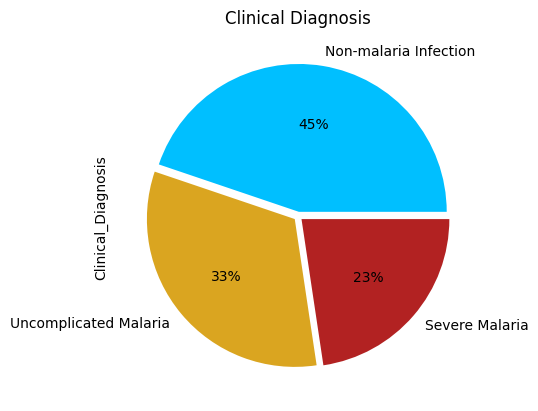

In [ ]:
#Visualise class distribution in pie chart

# Defining colors for the pie chart
colors = ['deepskyblue','goldenrod','firebrick']

# Define the ratio of gap of each fragment in a tuple
explode = (0.03, 0.03, 0.03)
# create pie chart
ax = subset['Clinical_Diagnosis'].value_counts().plot(kind='pie',
                                                      autopct='%1.0f%%',
                                                      colors=colors,
                                                      explode=explode)

# set title
ax.set_title('Clinical Diagnosis')

The dataset is imbalanced between the classes

Observe descrptive statistics

In [ ]:
subset.iloc[:,1:].describe().transpose() # all rows and from the 2nd column (i.e. exclude class label)

,count,mean,std,min,25%,50%,75%,max
wbc_count,2156.0,10.723516,5.944994,0.5,6.80,9.30,12.900,53.90
rbc_count,2156.0,3.911679,1.132454,0.5,3.34,4.17,4.650,6.67
hb_level,2156.0,9.423010,2.650261,1.4,7.90,10.20,11.325,18.70
hematocrit,2156.0,29.320223,8.802975,4.3,24.20,31.70,35.500,52.70
mean_cell_volume,2156.0,74.828256,8.046383,7.8,70.00,75.00,80.000,121.00
mean_corp_hb,2156.0,24.142189,3.203595,2.1,22.20,24.10,26.200,38.80
mean_cell_hb_conc,2156.0,32.259318,2.864637,15.7,30.60,32.10,33.425,46.60
platelet_count,2156.0,214.545176,128.697718,3.0,105.00,201.00,300.250,1087.00
platelet_distr_width,2156.0,14.137894,3.064643,0.0,12.90,14.90,15.600,23.90
mean_platelet_vl,2156.0,8.031447,1.194886,3.3,7.20,7.90,8.800,18.60


The value ranges for the columns differ significantly, therefore there is need to standardise/normalise the data for machine learning

Correlation

In [ ]:
#Check feature correlation
subset.corr()

<ipython-input-20-ed52053792ad>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  subset.corr()


,wbc_count,rbc_count,hb_level,hematocrit,mean_cell_volume,mean_corp_hb,mean_cell_hb_conc,platelet_count,platelet_distr_width,mean_platelet_vl,neutrophils_percent,lymphocytes_percent,mixed_cells_percent,neutrophils_count,lymphocytes_count,mixed_cells_count,RBC_dist_width_Percent
wbc_count,1.000000,-0.217584,-0.283881,-0.261736,-0.150900,-0.084770,0.066981,0.122330,0.022260,-0.100716,0.093870,-0.090940,-0.057664,0.876999,0.689196,0.715568,0.252208
rbc_count,-0.217584,1.000000,0.896557,0.922294,-0.017848,-0.348335,-0.497615,0.409424,0.001756,0.284809,0.077574,-0.073216,-0.056070,-0.134216,-0.233978,-0.200859,-0.364396
hb_level,-0.283881,0.896557,1.000000,0.968644,0.286931,0.023659,-0.302304,0.353828,0.068770,0.248323,0.162289,-0.158665,-0.093352,-0.153907,-0.338160,-0.273327,-0.562710
hematocrit,-0.261736,0.922294,0.968644,1.000000,0.279029,-0.101461,-0.479766,0.387830,0.091718,0.285169,0.119252,-0.113198,-0.083365,-0.152236,-0.294044,-0.253324,-0.510445
mean_cell_volume,-0.150900,-0.017848,0.286931,0.279029,1.000000,0.722231,-0.077781,-0.002473,0.268485,0.038404,0.094697,-0.079596,-0.111013,-0.080385,-0.168477,-0.199845,-0.413033
mean_corp_hb,-0.084770,-0.348335,0.023659,-0.101461,0.722231,1.000000,0.576017,-0.202177,0.094658,-0.189324,0.149581,-0.151628,-0.062552,-0.011729,-0.152329,-0.106754,-0.334053
mean_cell_hb_conc,0.066981,-0.497615,-0.302304,-0.479766,-0.077781,0.576017,1.000000,-0.310377,-0.187634,-0.329254,0.110667,-0.132823,0.043621,0.089524,-0.016254,0.090089,-0.013497
platelet_count,0.122330,0.409424,0.353828,0.387830,-0.002473,-0.202177,-0.310377,1.000000,0.070121,-0.036139,-0.056902,0.042694,0.089093,0.102714,0.078041,0.143232,-0.104004
platelet_distr_width,0.022260,0.001756,0.068770,0.091718,0.268485,0.094658,-0.187634,0.070121,1.000000,0.233941,0.001142,0.018399,-0.085652,0.015390,0.037808,-0.045928,-0.087467
mean_platelet_vl,-0.100716,0.284809,0.248323,0.285169,0.038404,-0.189324,-0.329254,-0.036139,0.233941,1.000000,-0.055283,0.052658,0.037840,-0.118462,-0.021988,-0.058788,-0.112433


<ipython-input-21-c6a31744e61c>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = sns.heatmap(subset.corr(), cmap='bwr',


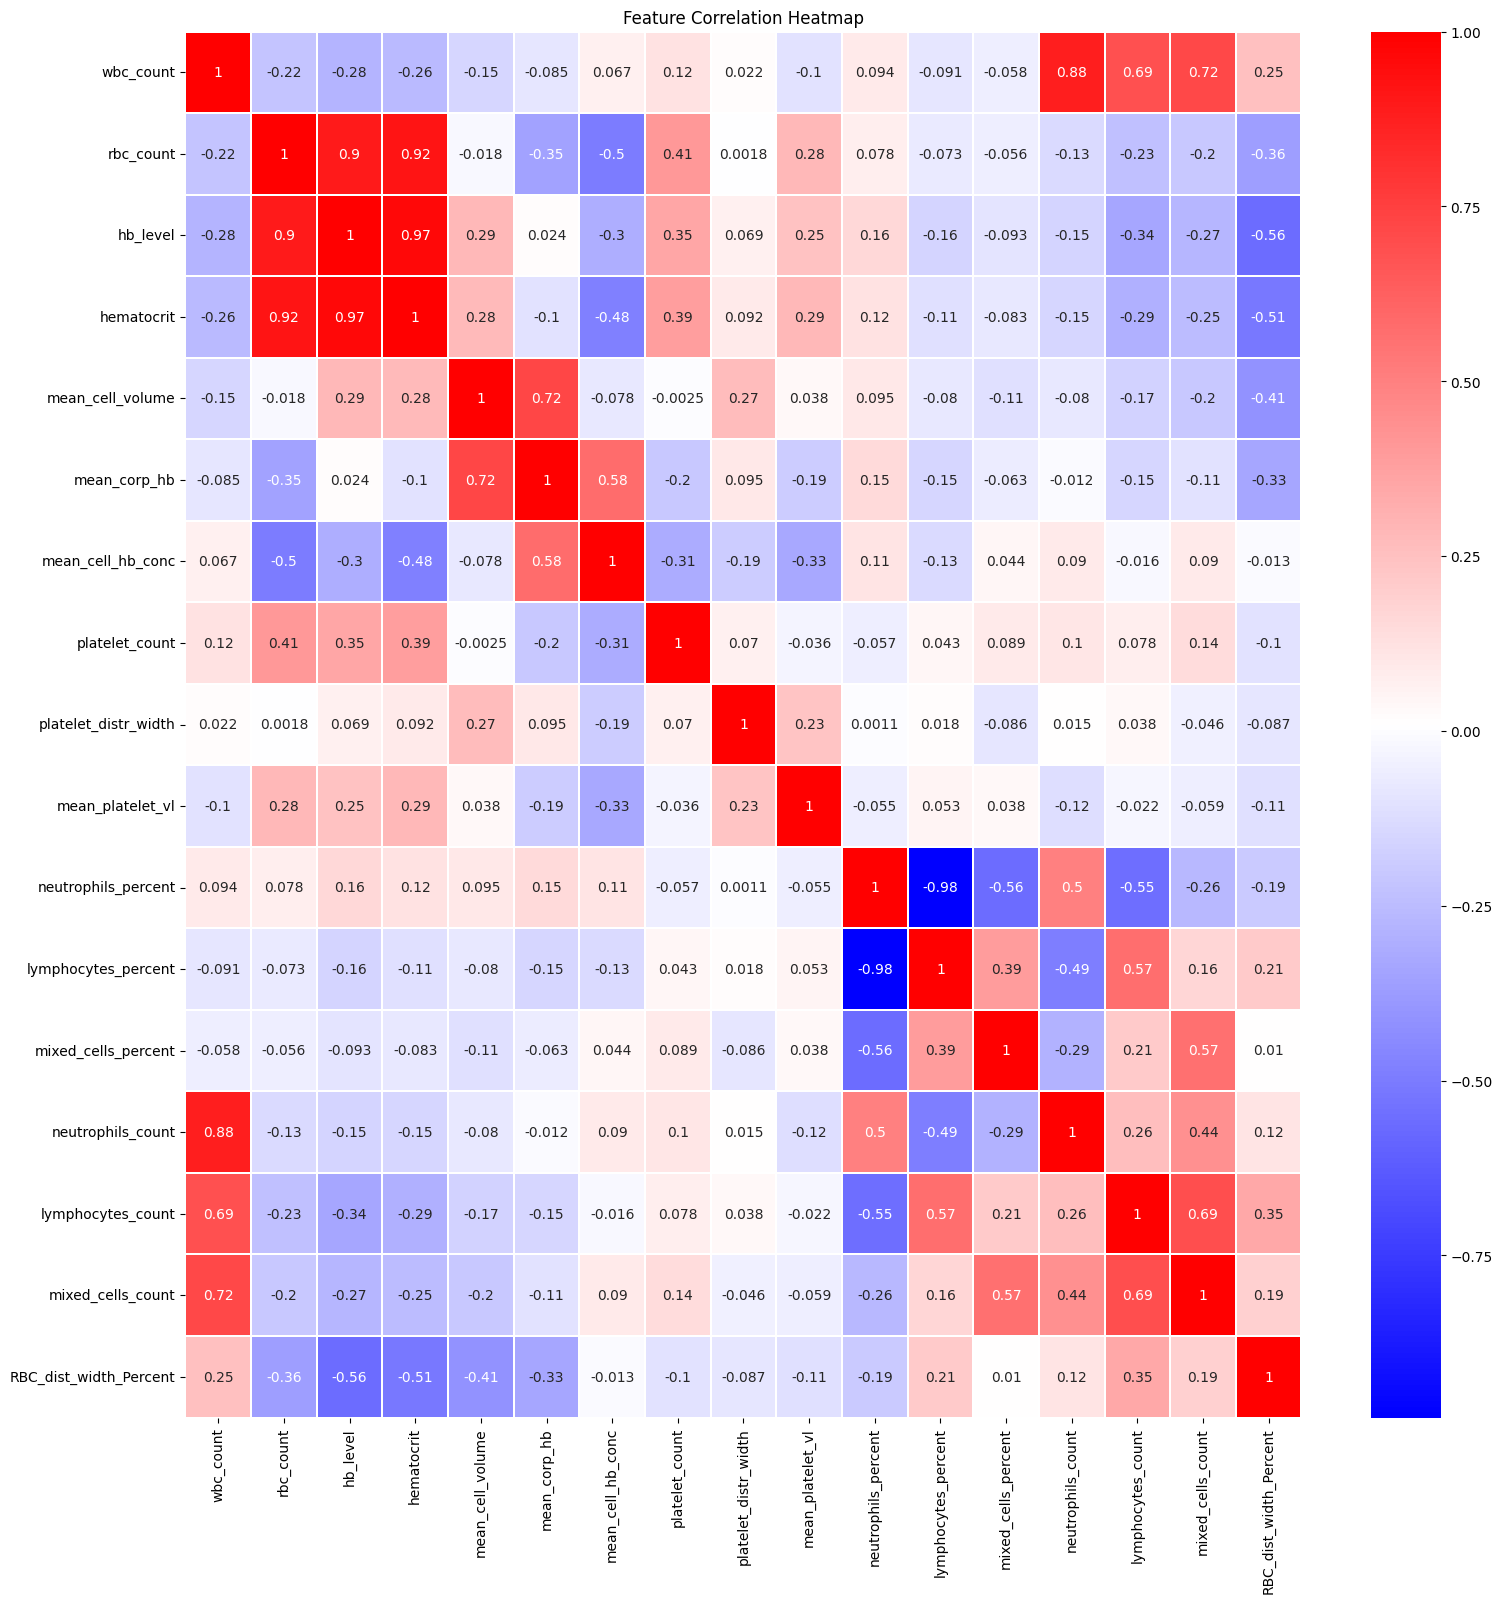

In [ ]:
#Visualise feature correlation matric on a heatmap using seaborn
#specify size of heatmap
plt.figure(figsize = (18,18))
corr = sns.heatmap(subset.corr(), cmap='bwr',
                    linewidth=.3,
                   annot=True,
                   annot_kws={'size': 10}
                   )

#set title
plt.title('Feature Correlation Heatmap', size = 12)
plt.show()

Remove redundant highly correlated features - Feature selection to handle Multicollinearity
- Very high correlation (>0.8 or <-0.8)between:
 - lymphocytes_count and neutrophils_count (-0.98)
 - neutrophils_count and wbc_count (0.88)
 - hematocrit and hb_level (0.97)
 - rbc_count and hb_level (0.9)

Remove neutrophils_count and hb_level as these feature are common to multiple instances of very high correlation

In [ ]:
#Remove neutrophils_count column
subset.drop(columns ='neutrophils_count', axis=1, inplace=True)
subset.shape

(2156, 17)

In [ ]:
#Remove hb_level column
subset.drop(columns ='hb_level', axis=1, inplace=True)
subset.shape

(2156, 16)

In [ ]:
subset.columns

Index(['Clinical_Diagnosis', 'wbc_count', 'rbc_count', 'hematocrit',
       'mean_cell_volume', 'mean_corp_hb', 'mean_cell_hb_conc',
       'platelet_count', 'platelet_distr_width', 'mean_platelet_vl',
       'neutrophils_percent', 'lymphocytes_percent', 'mixed_cells_percent',
       'lymphocytes_count', 'mixed_cells_count', 'RBC_dist_width_Percent'],
      dtype='object')

Check for outliers

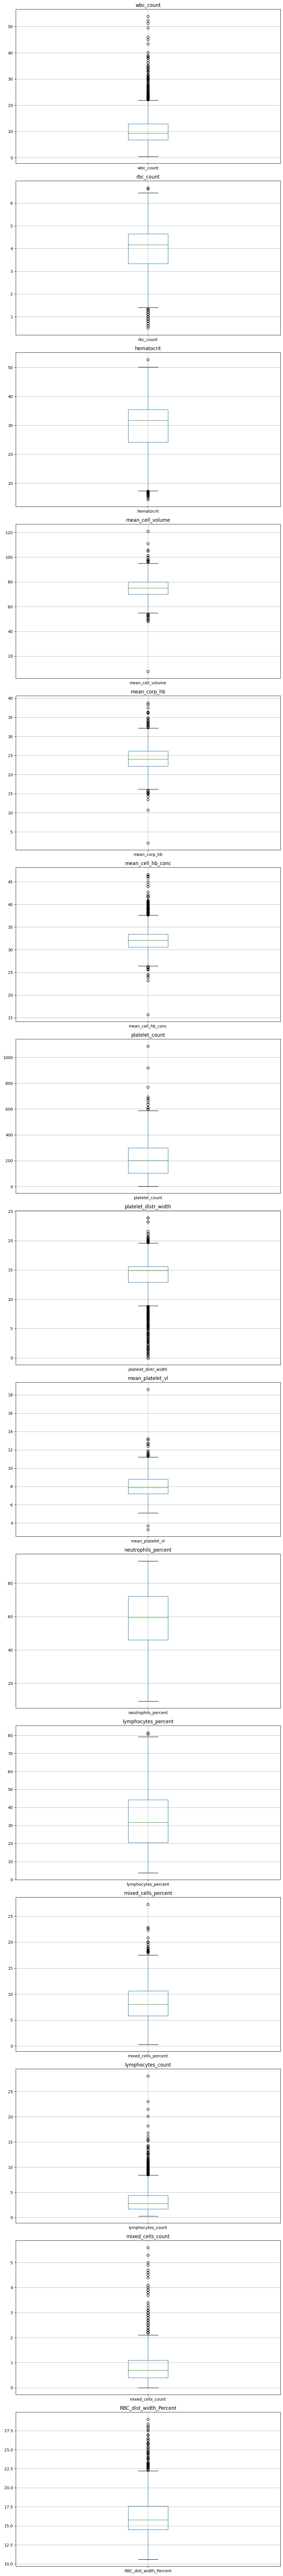

In [ ]:
#Visulaising numerical features as boxplots

# Exclude 'Clinical_Diagnosis' column
numeric_columns = subset.select_dtypes(include=['number']).columns

# Set up the figure and axes for subplots
fig, axes = plt.subplots(nrows=len(numeric_columns), figsize=(10, 6*len(numeric_columns)))

# Iterate over each numeric column and create a boxplot
for i, column in enumerate(numeric_columns):
    subset.boxplot(column=column, ax=axes[i])
    axes[i].set_title(column)  # Set the title for each subplot

plt.tight_layout()  # Adjust layout to prevent overlap of subplots
plt.show()


There are many outliers across features which need to be handled. Attempting different approaches of removing rows with outliers and imputing outlier values with the mean, the imputation approach resulted in better model performance.

Furthermore, this is not a large dataset, so it's ideal to keep as much data as possible to train a good model.

In [ ]:
# Exclude 'Clinical_Diagnosis' column
numeric_columns = subset.select_dtypes(include=['number']).columns

# Calculate the first quartile (Q1) and third quartile (Q3) for each numeric column
Q1 = subset[numeric_columns].quantile(0.25)
Q3 = subset[numeric_columns].quantile(0.75)

# Calculate the Interquartile Range (IQR) for each numeric column
IQR = Q3 - Q1

# Define a function to count outliers for each numeric column
def count_outliers(column):
    lower_bound = Q1[column] - 1.5 * IQR[column]
    upper_bound = Q3[column] + 1.5 * IQR[column]
    return ((subset[column] < lower_bound) | (subset[column] > upper_bound)).sum()

# Create a DataFrame to store the outlier counts for each numeric column
outlier_counts = pd.DataFrame(index=numeric_columns, columns=['Outlier Count'])

# Calculate and store the outlier counts for each numeric column
outlier_counts['Outlier Count'] = outlier_counts.index.to_series().apply(count_outliers)

# Print the table with total count of outliers for each feature
print(outlier_counts)


                        Outlier Count
wbc_count                         109
rbc_count                          72
hematocrit                         24
mean_cell_volume                   33
mean_corp_hb                       39
mean_cell_hb_conc                 127
platelet_count                     12
platelet_distr_width              152
mean_platelet_vl                   23
neutrophils_percent                 0
lymphocytes_percent                 2
mixed_cells_percent                23
lymphocytes_count                 103
mixed_cells_count                  99
RBC_dist_width_Percent             68


In [ ]:
#Remove all rows with at least one outlier value approach

# Exclude 'Clinical_Diagnosis' column
#numeric_columns = subset.select_dtypes(include=['number']).columns

# Calculate the first quartile (Q1) and third quartile (Q3) for each numeric column
#Q1 = subset[numeric_columns].quantile(0.25)
#Q3 = subset[numeric_columns].quantile(0.75)

# Calculate the Interquartile Range (IQR) for each numeric column
#IQR = Q3 - Q1

# Define a function to check if a row has any outlier values
#def has_outlier(row):
#    lower_bounds = Q1 - 1.5 * IQR
#    upper_bounds = Q3 + 1.5 * IQR
#    return ((row[numeric_columns] < lower_bounds) | (row[numeric_columns] > upper_bounds)).any()

# Apply the has_outlier function to each row in the DataFrame
#outlier_mask = subset.apply(has_outlier, axis=1)

# Remove rows with at least one outlier
#subset = subset[~outlier_mask]

# Print the cleaned DataFrame
#print(subset)


In [ ]:
# Replace outlier values with imputed mean

# Exclude 'Clinical_Diagnosis' column
numeric_columns = subset.select_dtypes(include=['number']).columns

# Calculate the first quartile (Q1) and third quartile (Q3) for each numeric column
Q1 = subset[numeric_columns].quantile(0.25)
Q3 = subset[numeric_columns].quantile(0.75)

# Calculate the Interquartile Range (IQR) for each numeric column
IQR = Q3 - Q1

# Define a function to impute outliers with the mean of their respective columns
def impute_outliers(row):
    lower_bounds = Q1 - 1.5 * IQR
    upper_bounds = Q3 + 1.5 * IQR
    for col in numeric_columns:
        if row[col] < lower_bounds[col] or row[col] > upper_bounds[col]:
            row[col] = subset[col].mean()  # Replace outlier with mean
    return row

# Apply the impute_outliers function to each row in the DataFrame
subset = subset.apply(impute_outliers, axis=1)

subset.head()
subset.shape


(2156, 16)

# Random Forest

## Data Pre-processing

In [ ]:
# create separate objects for the labels/classes (y) and features (X)
X = subset.iloc[:,1:] # select all rows and all columns except label/class column
y = subset.iloc[:,0] # select all rows and label/class column only (Clinical Diagnosis)

In [ ]:
X.shape

(2156, 15)

In [ ]:
y.shape

(2156,)

Encode the labels using scikit learn which will asign unique integer values to each label class (i.e. 0, 1, 2)

In [ ]:
label_encoder = LabelEncoder() #create a label encoder object
label_encoder.fit(y) #give labels to the the encoder

y_encoded = label_encoder.transform(y) #assign labels to the encoding

In [ ]:
#pint first 10 values
print(y[0:10])
print(y_encoded[0:10])

0    Severe Malaria
1    Severe Malaria
2    Severe Malaria
3    Severe Malaria
4    Severe Malaria
5    Severe Malaria
6    Severe Malaria
7    Severe Malaria
8    Severe Malaria
9    Severe Malaria
Name: Clinical_Diagnosis, dtype: object
[1 1 1 1 1 1 1 1 1 1]


In [ ]:
#Check how encoding labels have been assigned
classes = label_encoder.classes_
print(classes)

['Non-malaria Infection' 'Severe Malaria' 'Uncomplicated Malaria']


In [ ]:
#Check how encoding labels have been assigned
mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(mapping)

{'Non-malaria Infection': 0, 'Severe Malaria': 1, 'Uncomplicated Malaria': 2}


Train / Test Split

In [ ]:
#Train test data split ratio 80:20
X_train, X_test, y_train, y_test = train_test_split(X,y_encoded,test_size=0.2, random_state=29)

In [ ]:
X_train.shape

(1724, 15)

In [ ]:
y_train.shape

(1724,)

In [ ]:
X_test.shape

(432, 15)

In [ ]:
y_test.shape

(432,)

Standardise the data

In [ ]:
#Normalise the data to take values between 0 and 1
min_max_scaler = MinMaxScaler() #Create scaler object
#scale training and test data
X_train_scaled = min_max_scaler.fit_transform(X_train)
X_test_scaled = min_max_scaler.fit_transform(X_test)

In [ ]:
#Compare scaled and original data on first data point
print(X_train.iloc[0,0])
print(X_train_scaled[0,0])

6.8
0.294392523364486


## Model Training

Chosen to use a random model classifier since this is a multi-class classification problem, for which a random forest is suitable to perform well.

In [ ]:
#Create a random forest classifier
clf = RandomForestClassifier() # Create the classifier object
clf.fit(X_train_scaled, y_train) #fit the model to the training data


RandomForestClassifier()

## Model Testing

In [ ]:
# Perform model predictions on the train dataset
y_train_pred = clf.predict(X_train_scaled)

In [ ]:
# Perform model predictions on the test dataset
y_pred = clf.predict(X_test_scaled)

In [ ]:
#Compare a sample predicted values to their original test set values
print(y_test[0:5])
print(y_pred[0:5])

[0 1 2 2 0]
[0 1 0 0 0]


## Model Evaluation

Metrics used:
- Accuracy
- f1 score
- recall
- precision
- confusion matrix

In [ ]:
#balanced accuracy - using balanced accuracy score to account for data imbalance

balanced_accuracy = balanced_accuracy_score(y_test,y_pred)
balanced_accuracy = round(balanced_accuracy,3) #round to 3sf
print('balanced_accuracy:', balanced_accuracy)

#f1 - use average='weighted to account for data imbalance

f1 = f1_score(y_test,y_pred, average='weighted')
f1 = round(f1,3) #round to 3sf
print('f1 score:', f1)

#recall - use average='weighted to account for data imbalance
recall = recall_score(y_test,y_pred, average='weighted')
recall = round(recall,3) #round to 3sf
print('recall:', recall)

#precision - use average='weighted to account for data imbalance
precision = precision_score(y_test,y_pred, average='weighted')
precision = round(precision,3) #round to 3sf
print('precision:', precision)

balanced_accuracy: 0.831
f1 score: 0.842
recall: 0.843
precision: 0.844


Visualise Decision Trees

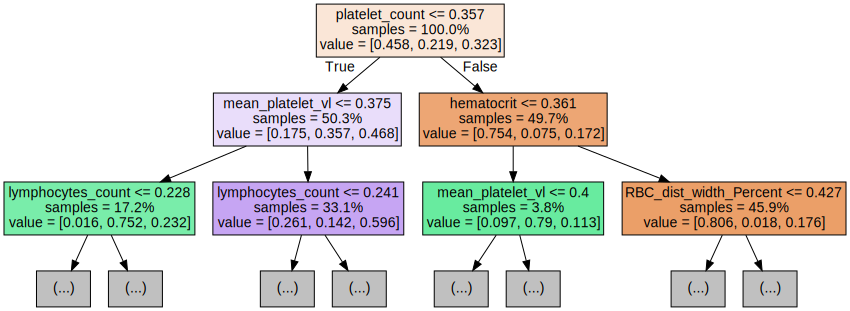

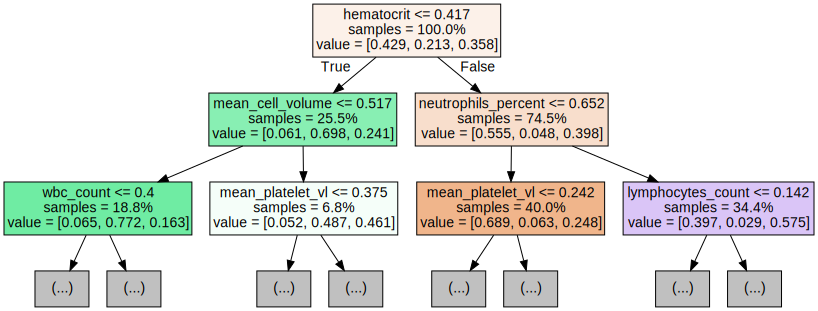

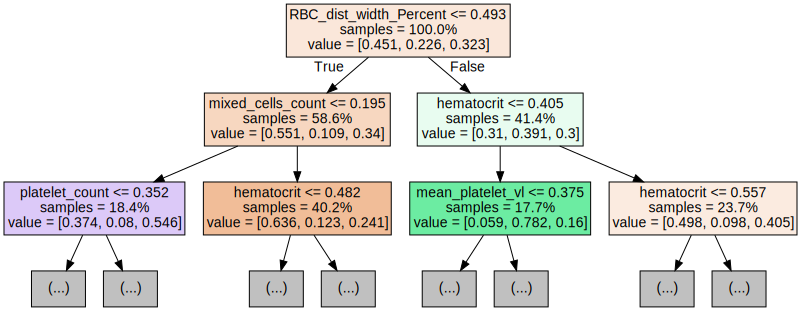

In [ ]:
# Visualise the first three decision trees from the forest

for i in range(3):
    tree = clf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

Visualise Confusion Matrix

<Figure size 1000x800 with 0 Axes>

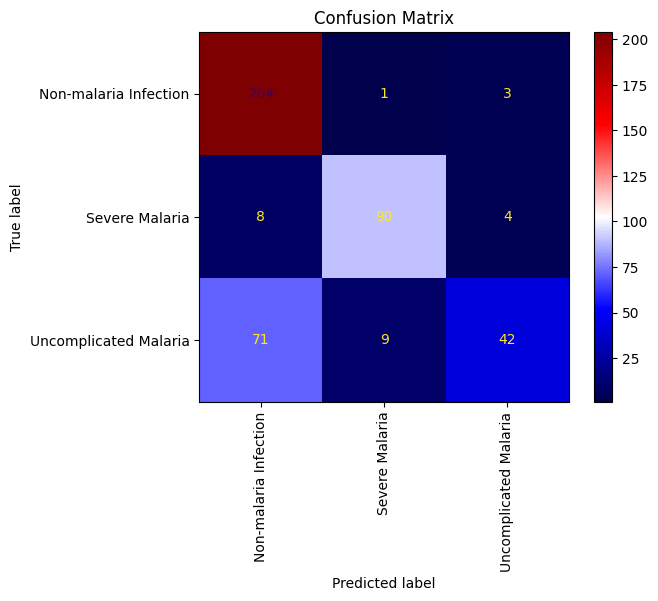

In [ ]:
# Specify figure size
plt.figure(figsize=(10, 8))

# Create ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes
                              )

# Plot confusion matrix
disp.plot(colorbar=False)

# Customize labels rotation
plt.xticks(rotation=90)  # Rotate x labels by 45 degrees
plt.yticks(rotation=0)  # Rotate y labels by 45 degrees

# Customize colors
plt.imshow(disp.confusion_matrix, cmap=plt.cm.seismic, interpolation='nearest')

plt.title('Confusion Matrix')
plt.colorbar()  # Add color bar

plt.show()


## Hyperparameter tuning to improve model performance

In [ ]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
clf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(clf,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=5)

# Fit the random search object to the train data
rand_search.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ac2706fada0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ac270526140>})

In [ ]:
# Create a variable for the best rf model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 16, 'n_estimators': 219}


In [ ]:
# Generate model predictions on the test dataset with the best model
y_pred = best_rf.predict(X_test_scaled)

Best Random Forest Model Evaluation Metrics

In [ ]:
#balanced accuracy
balanced_accuracy_best = balanced_accuracy_score(y_test,y_pred)
balanced_accuracy_best = round(balanced_accuracy_best,3) #round to 3sf
print('balanced_accuracy_best:', balanced_accuracy_best)

#f1 score
f1_best = f1_score(y_test,y_pred, average='weighted')
f1_best = round(f1_best,3) #round to 3sf
print('f1_best:', f1_best)

#recall - use average='weighted to account for data imbalance
recall_best = recall_score(y_test,y_pred, average='weighted')
recall_best = round(recall_best,3) #round to 3sf
print('recall_best:', recall_best)

#precision - use average='weighted to account for data imbalance
precision_best = precision_score(y_test,y_pred, average='weighted')
precision_best = round(precision_best,3) #round to 3sg
print('precision_best:', precision_best)

balanced_accuracy_best: 0.827
f1_best: 0.839
recall_best: 0.838
precision_best: 0.843


Visualise the Confusion Matrix

<Figure size 1000x800 with 0 Axes>

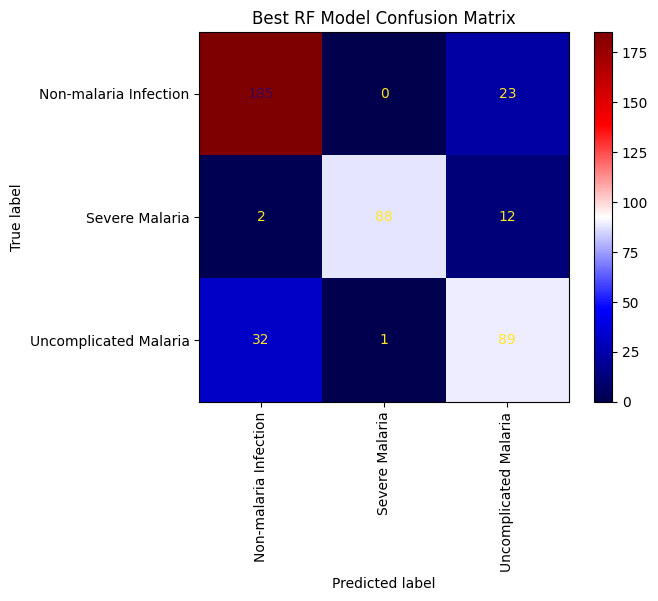

In [ ]:
# Create the confusion matrix
cm_best = confusion_matrix(y_test, y_pred)

# Specify figure size
plt.figure(figsize=(10, 8))

# Create ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm_best, display_labels=classes
                              )
# Plot confusion matrix
disp.plot(colorbar=False)

# Customize labels rotation
plt.xticks(rotation=90)  # Rotate x labels by 45 degrees
plt.yticks(rotation=0)  # Rotate y labels by 45 degrees

# Customize colors
plt.imshow(disp.confusion_matrix, cmap='seismic', interpolation='nearest')

plt.title('Best RF Model Confusion Matrix')
plt.colorbar()  # Add color bar

plt.show()